# Module 05: Locally Weighted Linear Regression

**Following CS229** | *Gold Standard Edition*

## 1. Definition & When to Use

### What is Locally Weighted Linear Regression (LWLR)?

Alright, let's dive in. **LWLR** is a **non-parametric** supervised learning algorithm. Unlike standard Linear Regression (parametric) which fits _one_ global line to all your data, LWLR fits a **new line locally** for each query point you care about.

**Weight Formula:** $w^{(i)} = \exp\left(-\frac{(x^{(i)} - x)^2}{2\tau^2}\right)$

**Weighted MSE:** $J(\theta) = \sum_{i=1}^{m} w^{(i)} (y^{(i)} - \theta^T x^{(i)})^2$

**Key Concepts:**
1. **Non-parametric:** Number of parameters grows with amount of data.
2. **Local:** Only cares about data around query point $x$.
3. **Bandwidth (τ):** Controls how "far" we look at neighbors.

---

### When to Use Locally Weighted Linear Regression (LWLR)?

| Scenario | Use It | Don't Use It |
|----------|-----------|----------------|
| **Non-linear complex pattern** | LWLR (fits curves naturally) | Linear Regression (underfits) |
| **Small-medium dataset** | < 5K samples (lazy learning) | Big data (too slow per query) |
| **High accuracy needed** | Low bias | High variance risk |
| **No training phase needed** | Lazy learning (instant fit) | Deployment speed critical |

---

### Real-World Examples:
**Autonomous Helicopter**: Andrew Ng's famous work - controlling trajectory based on similar past states
**Stock Smoothing**: Identify local trends in noisy stock data
**Robot Arm Control**: Learning inverse dynamics locally

**Analogy: 'Flashlight in Darkness'**
- **Linear Regression** = Turning on stadium lights (uniformly bright everywhere)
- **LWLR** = Using a flashlight – only illuminates data near your query point

## 2. Visual Intuition: Gaussian Kernel

Alright, here's where it gets interesting. The core of LWLR is **weighting** – but how exactly do we assign weights to data points?

**Gaussian Kernel Formula:**
$$ w(i) = \exp\left(-\frac{(x^{(i)} - x_{query})^2}{2\tau^2}\right) $$

Let's visualize this curve to make it concrete. **The closer the data is to the query point, the higher its weight.**

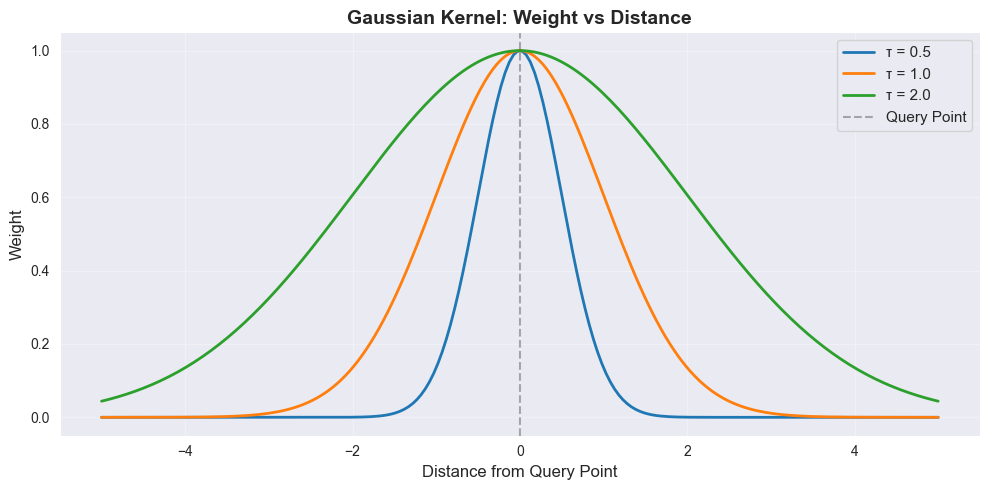

📊 Notice how larger tau values create wider curves → more points get influence!


In [9]:
# ═══════════════════════════════════════════════════════════════
# 👁️ VISUAL INTUITION: WEIGHT FUNCTION
# ═══════════════════════════════════════════════════════════════
import numpy as np
import matplotlib.pyplot as plt

# Define the Gaussian kernel - this is the heart of LWLR
def gaussian_kernel(distance, tau):
    """Calculate weight based on distance from query point"""
    return np.exp(-(distance**2) / (2 * tau**2))

# Create a range of distances to visualize
distances = np.linspace(-5, 5, 200)
taus = [0.5, 1.0, 2.0]  # Different bandwidth parameters

plt.figure(figsize=(10, 5))

# Plot weight curves for different tau values
for tau in taus:
    weights = gaussian_kernel(distances, tau)
    plt.plot(distances, weights, label=f'τ = {tau}', linewidth=2)

plt.title('Gaussian Kernel: Weight vs Distance', fontsize=14, fontweight='bold')
plt.xlabel('Distance from Query Point', fontsize=12)
plt.ylabel('Weight', fontsize=12)
plt.axvline(0, color='k', linestyle='--', alpha=0.3, label='Query Point')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("📊 Notice how larger tau values create wider curves → more points get influence!")


### 🔍 What You're Seeing:

**Peak at Center (Distance = 0):**
- Data points **exactly** at the query point get weight **1.0** – full influence!

**Bell Width (Controlled by Tau):**
- **Small Tau (0.5):** Narrow bell curve → Only **very close** neighbors matter. Great for capturing local details, but watch out for overfitting!
- **Large Tau (2.0):** Wide bell curve → Even distant points contribute. The fit becomes smoother, more like standard Linear Regression.

**Exponential Decay:**
- Here's the elegant part: as distance increases, weights drop exponentially toward zero. Points far from the query essentially get ignored.


## 3. Manual Calculation: Computing Weights

Alright, now for the fun part – let's calculate weights manually for a house pricing example.

**Scenario:** You want to predict the price of a 150 m² house using 3 neighboring houses as training data.

In [10]:
# ═══════════════════════════════════════════════════════════════
# 📝 MANUAL CALCULATION: WEIGHTS
# ═══════════════════════════════════════════════════════════════
print('🧮 MANUAL LWLR WEIGHT CALCULATION')
print('='*60)
print()

# Step 1: Setup our example data
# We want to predict the price of a 150 m² house
x_query = 150  
X_data = np.array([140, 150, 200])  # 3 neighboring houses in our database
y_data = np.array([300, 350, 500])  # Their prices (in million)
tau = 10.0  # Bandwidth parameter

print(f'🎯 Query Point: {x_query} m²')
print(f'📊 Training Data: {X_data} m²')
print(f'💰 Prices: {y_data} million')
print(f'⚙️  Tau (τ): {tau}')
print()

# Step 2: Calculate distances from query point
diff = X_data - x_query
print('STEP 1: Calculate Distance Difference (xᵢ - x_query)')
print(f'  Distances = {diff}')
print()

# Step 3: Square the distances
sq_diff = diff ** 2
print('STEP 2: Square the distances')
print(f'  Squared Distances = {sq_diff}')
print()

# Step 4: Calculate the exponent term for Gaussian kernel
exponent = -sq_diff / (2 * tau**2)
print('STEP 3: Calculate exponent term: -distance² / (2τ²)')
print(f'  Exponents = {exponent}')
print()

# Step 5: Apply exponential to get final weights
weights = np.exp(exponent)
print('STEP 4: Apply exponential function: e^(exponent)')
print(f'  Weights = {weights}')
print()

# Interpret the results
print('='*60)
print('🔍 INTERPRETATION:')
print()
print(f'  House at 140 m² (distance: 10):  weight = {weights[0]:.4f}')
print(f'    → Relevant! Close neighbor, gets significant influence')
print()
print(f'  House at 150 m² (distance: 0):   weight = {weights[1]:.4f}')
print(f'    → Perfect match! Exactly at query point, maximum influence')
print()
print(f'  House at 200 m² (distance: 50):  weight = {weights[2]:.6f}')
print(f'    → Essentially ignored. Too far away, negligible influence')
print()
print('✨ See how weights naturally prioritize nearby data points!')


🧮 MANUAL LWLR WEIGHT CALCULATION

🎯 Query Point: 150 m²
📊 Training Data: [140 150 200] m²
💰 Prices: [300 350 500] million
⚙️  Tau (τ): 10.0

STEP 1: Calculate Distance Difference (xᵢ - x_query)
  Distances = [-10   0  50]

STEP 2: Square the distances
  Squared Distances = [ 100    0 2500]

STEP 3: Calculate exponent term: -distance² / (2τ²)
  Exponents = [ -0.5   0.  -12.5]

STEP 4: Apply exponential function: e^(exponent)
  Weights = [6.06530660e-01 1.00000000e+00 3.72665317e-06]

🔍 INTERPRETATION:

  House at 140 m² (distance: 10):  weight = 0.6065
    → Relevant! Close neighbor, gets significant influence

  House at 150 m² (distance: 0):   weight = 1.0000
    → Perfect match! Exactly at query point, maximum influence

  House at 200 m² (distance: 50):  weight = 0.000004
    → Essentially ignored. Too far away, negligible influence

✨ See how weights naturally prioritize nearby data points!


## 4. Statistical Framework: The Math Behind LWLR

Now that you've seen weights in action, let's formalize the math. Don't worry – we'll walk through each piece.

### Weighted Cost Function

For a given query point $x$, we minimize:
$$J(\theta; x) = \sum_{i=1}^m w^{(i)}(y^{(i)} - \theta^T x^{(i)})^2$$

This is just like ordinary least squares, but each training point $(x^{(i)}, y^{(i)})$ is weighted by $w^{(i)}$.

### Weight Function (Gaussian Kernel)

$$w^{(i)} = \exp\left(-\frac{(x^{(i)} - x)^2}{2\tau^2}\right)$$

The farther $x^{(i)}$ is from our query point $x$, the smaller its weight. Simple as that.

### Closed-Form Solution

The optimal parameters are given by:
$$\theta = (X^T W X)^{-1} X^T W y$$

where $W$ is a diagonal matrix with $W_{ii} = w^{(i)}$ on the diagonal. This is the weighted version of the normal equation you know from standard linear regression.

---

## 5. Breaking Down the Weight Formula

Let's dissect this formula piece by piece:

$$w^{(i)} = \underbrace{\exp}_{\text{0 to 1 range}} \left( -\frac{\overbrace{(x^{(i)} - x)^2}^{\text{squared distance}}}{\underbrace{2\tau^2}_{\text{bandwidth}}} \right)$$

### What each part does:

**Distance Effects:**
- **Small distance** → weight ≈ 1 → Strong influence on prediction
- **Large distance** → weight ≈ 0 → Essentially ignored

**Tau (Bandwidth) Effects:**
- **Large τ** → Smoother fit, more global (like standard regression)
- **Small τ** → More local, wiggly fit (captures fine details)

Think of τ as a zoom lens: small τ zooms in locally, large τ zooms out globally.

---

## 6. Industry Examples

### 1. Finance: Volatility Surface
- Options pricing varies by strike/maturity
- LWLR for smooth interpolation

### 2. Healthcare: Growth Curves
- Child weight/height is non-linear
- Local fit for each age

### 3. Climate: Local Temperature
- Temperature varies by location/season
- LWLR captures local patterns

---

## 7. IF-THEN Decision Table

| Condition (if) | Interpretation (then) | Action |
|----------------|---------------------|------|
| if τ small, curve wiggly | then overfitting | ↑ τ |
| if τ large, curve too flat | then underfitting | ↓ τ |
| if prediction slow | then O(m³) per query | Consider approximations |

---

## 8. Exercise: The Reality Check

Alright, before we wrap up, let's test your understanding with an important question.

LWLR is incredibly flexible and can fit complex patterns beautifully. But here's the thing – **nothing comes for free** in machine learning. Every algorithm has tradeoffs.

**Q:** What are the main weaknesses of LWLR compared to parametric models like standard Linear Regression?

Think about this for a moment before expanding the answer below. Consider what we need to do at prediction time...

<details><summary>🔑 Answer</summary>

Here are the three big costs you pay for LWLR's flexibility:

1. **Computational cost**: **O(m³) per prediction** – Remember, we have to solve a weighted least squares problem (matrix inversion) for **every single prediction**. With parametric models? You train once, then predictions are just matrix multiplications (blazingly fast).

2. **No compression**: **Must store all training data** – Unlike parametric models where you compress everything into a fixed set of parameters (θ₀, θ₁, ...), LWLR is a "lazy learner." You need to keep the entire training dataset around forever. Got 1 million training examples? You're storing 1 million examples in production.

3. **Curse of dimensionality**: **Sparse neighbors in high-D** – As dimensions increase, the notion of "nearby" breaks down. Points that look close in Euclidean distance might actually be far apart in meaningful ways. Your weights become less useful, and you need exponentially more data to maintain the same density.

**Bottom line:** LWLR is fantastic for small-to-medium datasets with clear non-linear patterns. But for large-scale production systems? The computational and storage costs often make parametric alternatives (or more scalable non-parametric methods like Random Forests) more practical.

</details>

---

## 9. Setup & Imports

In [11]:
# ═══════════════════════════════════════════════════════════════
# 🔧 SETUP & IMPORTS
# ═══════════════════════════════════════════════════════════════
# Alright, let's get our environment ready. We'll need the usual suspects:
# NumPy for math, Matplotlib for viz, and sklearn for comparison.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

# Make our plots look nice
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
# (So you get the same results every time you run this notebook)
np.random.seed(42)

print("✅ Setup completed!")
print("📦 All libraries loaded and ready to go")
print("🎨 Plot styling configured")
print("\n🚀 Ready to dive into Locally Weighted Linear Regression!")
print("💡 We'll implement LWLR from scratch - best way to learn!")

✅ Setup completed!
📦 All libraries loaded and ready to go
🎨 Plot styling configured

🚀 Ready to dive into Locally Weighted Linear Regression!
💡 We'll implement LWLR from scratch - best way to learn!


## 10. Generate Synthetic Data

Alright, time to get hands-on!

To really see LWLR in action, we need data with **clear non-linear patterns** – the kind that makes standard Linear Regression struggle. We'll generate a sine wave with some noise mixed in. This is perfect because it has smooth curves that change direction, exactly where LWLR shines.

**What we're creating:** A dataset where the relationship between x and y follows `y = sin(x) * 3 + 0.3x + noise`. Standard LR will try to fit a straight line through this, which won't work well. But LWLR? It'll adapt locally to the curves.

Let's generate the data and visualize what we're working with:

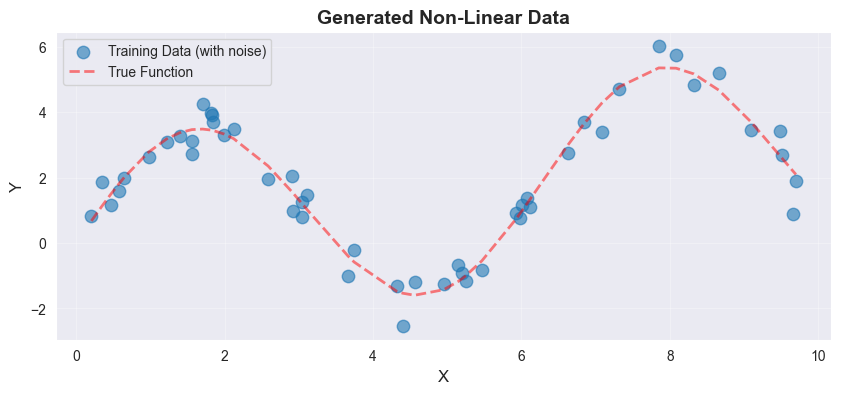

Generated 50 samples
X range: [0.21, 9.70]
y range: [-2.53, 6.03]


In [13]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_samples = 50
X_train = np.random.uniform(0, 10, n_samples)

# True function: y = sin(x) * 3 + x * 0.3 + noise
# This non-linear pattern is hard for standard LR to fit
y_true = np.sin(X_train) * 3 + X_train * 0.3
noise = np.random.normal(0, 0.5, n_samples)
y_train = y_true + noise

# Visualize
plt.figure(figsize=(10, 4))
plt.scatter(X_train, y_train, alpha=0.6, s=80, label='Training Data (with noise)')
X_sorted = np.sort(X_train)  # Use np.sort instead of sorted() to keep as numpy array
plt.plot(X_sorted, np.sin(X_sorted) * 3 + X_sorted * 0.3, 
         'r--', alpha=0.5, linewidth=2, label='True Function')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Generated Non-Linear Data', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print(f"Generated {n_samples} samples")
print(f"X range: [{X_train.min():.2f}, {X_train.max():.2f}]")
print(f"y range: [{y_train.min():.2f}, {y_train.max():.2f}]")

## 11. Implement LocalWeightedLR Class

Now for the main event – let's build our LWLR implementation from scratch!

This class will handle:
1. **Weight calculation** using the Gaussian kernel
2. **Weighted least squares fitting** for each query point
3. **Batch predictions** across multiple test points

The beauty of implementing it yourself? You'll understand exactly what's happening under the hood.

In [14]:
# ═══════════════════════════════════════════════════════════════
# 🛠️ LWLR CLASS IMPLEMENTATION
# ═══════════════════════════════════════════════════════════════

class LocalWeightedLR:
    """
    Locally Weighted Linear Regression (LWLR)
    
    A non-parametric regression algorithm that fits a weighted linear model
    for each query point, where weights decrease with distance from the query.
    
    Parameters:
    -----------
    tau : float
        Bandwidth parameter controlling the weight decay.
        - Small tau (0.1-0.3): Very local, high flexibility
        - Medium tau (0.5-1.0): Balanced
        - Large tau (1.5+): More global, approaches standard LR
    """
    
    def __init__(self, tau=0.5):
        self.tau = tau
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        """
        Store training data (LWLR is a lazy learner - no actual training)
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Training data
        y : array-like, shape (n_samples,)
            Target values
        """
        self.X_train = np.array(X)
        self.y_train = np.array(y)
        return self
    
    def _calculate_weights(self, x_query):
        """
        Calculate Gaussian kernel weights for a single query point
        
        Parameters:
        -----------
        x_query : array-like, shape (n_features,)
            Query point for prediction
            
        Returns:
        --------
        weights : array, shape (n_samples,)
            Weight for each training sample
        """
        # Calculate squared Euclidean distance
        distances_sq = np.sum((self.X_train - x_query) ** 2, axis=1)
        
        # Apply Gaussian kernel: w = exp(-distance² / (2τ²))
        weights = np.exp(-distances_sq / (2 * self.tau ** 2))
        
        return weights
    
    def _predict_single(self, x_query):
        """
        Make prediction for a single query point
        
        Parameters:
        -----------
        x_query : array-like, shape (n_features,)
            Single query point
            
        Returns:
        --------
        prediction : float
            Predicted value
        """
        # Calculate weights for this query point
        weights = self._calculate_weights(x_query)
        
        # Create diagonal weight matrix
        W = np.diag(weights)
        
        # Add bias term (intercept)
        X_b = np.c_[np.ones(len(self.X_train)), self.X_train]
        x_query_b = np.concatenate([[1], np.atleast_1d(x_query).flatten()])
        
        # Solve weighted least squares: θ = (X^T W X)^(-1) X^T W y
        try:
            XtWX = X_b.T @ W @ X_b
            XtWy = X_b.T @ W @ self.y_train
            theta = np.linalg.solve(XtWX, XtWy)
        except np.linalg.LinAlgError:
            # Fallback to pseudo-inverse if matrix is singular
            theta = np.linalg.pinv(X_b.T @ W @ X_b) @ X_b.T @ W @ self.y_train
        
        # Make prediction
        prediction = x_query_b @ theta
        
        return prediction
    
    def predict(self, X):
        """
        Make predictions for multiple query points
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
            Query points for prediction
            
        Returns:
        --------
        predictions : array, shape (n_samples,)
            Predicted values
        """
        X = np.array(X)
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        
        # Predict for each query point
        predictions = np.array([self._predict_single(x) for x in X])
        
        return predictions

print("✅ LocalWeightedLR class successfully implemented!")
print("📚 Class methods:")
print("   - fit(X, y): Store training data")
print("   - predict(X): Make predictions for query points")
print("   - _calculate_weights(x): Compute Gaussian kernel weights")
print("\n🎯 Ready to use LWLR on our data!")

✅ LocalWeightedLR class successfully implemented!
📚 Class methods:
   - fit(X, y): Store training data
   - predict(X): Make predictions for query points
   - _calculate_weights(x): Compute Gaussian kernel weights

🎯 Ready to use LWLR on our data!


## 12. Deep Dive: The Math

Let's break this down.

### Weight Formula (Gaussian Kernel)
$$w_i(x) = \exp\left(-\frac{||x_i - x_{query}||^2}{2\tau^2}\right)$$

**What each symbol means:**
- $x_i$ = training point
- $x_{query}$ = point we want to predict
- $\tau$ (tau) = bandwidth parameter
- $||x_i - x_{query}||^2$ = squared Euclidean distance

**Tau (bandwidth) behavior:**
- Tau **small** (0.1-0.3) → Only nearby points get significant weight
- Tau **large** (1.0-2.0) → More points influence the prediction

Let's see how this looks!

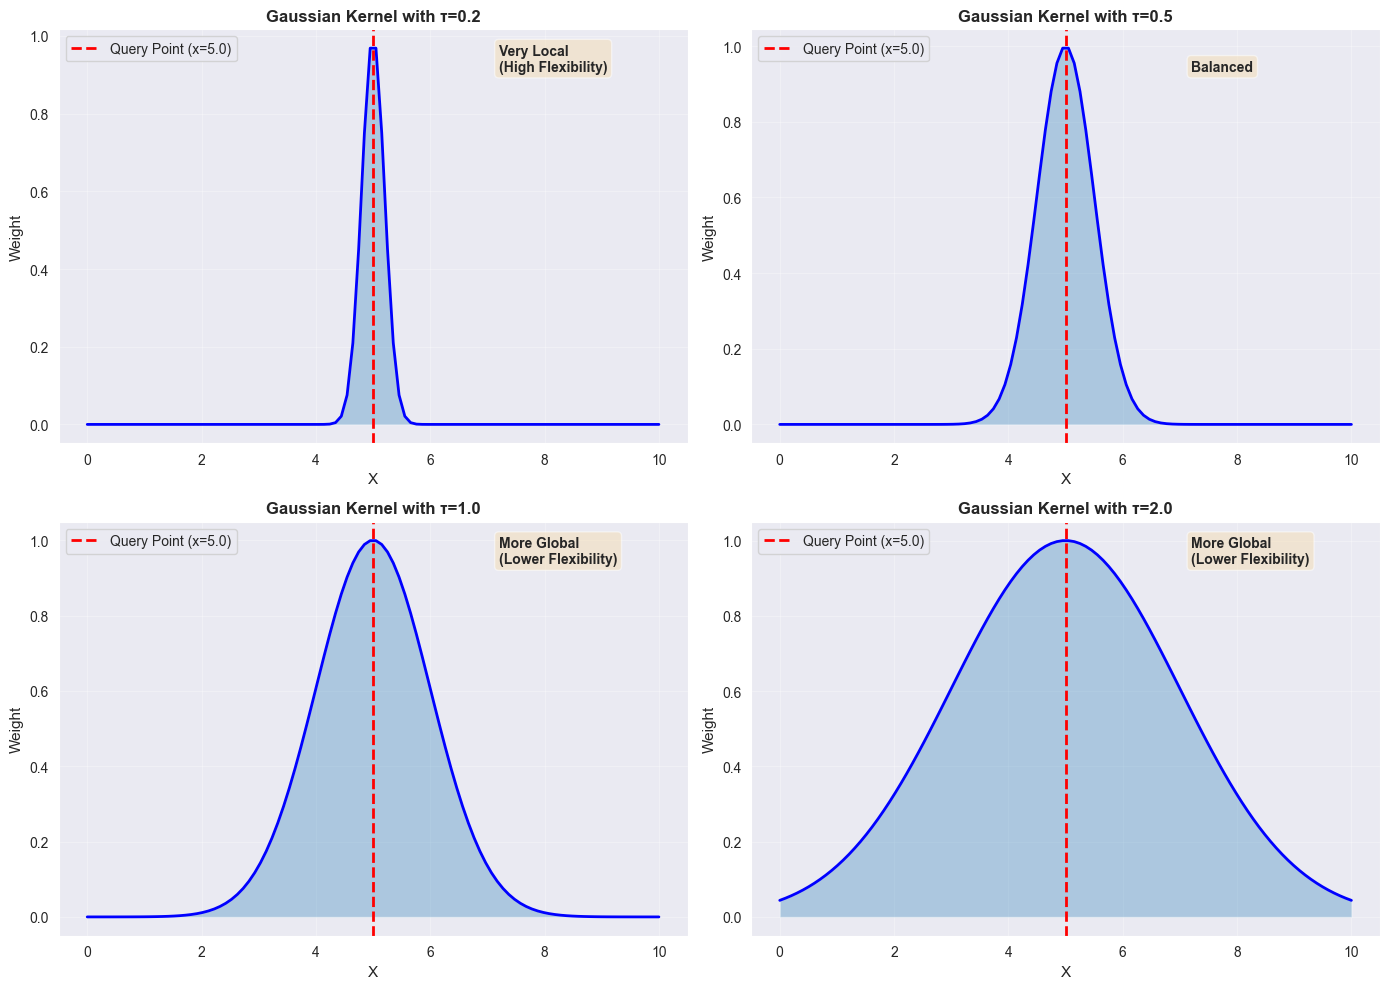

👆 Notice how tau affects the 'spread' of influence!


In [15]:
def visualize_kernel_effect(tau_values=[0.2, 0.5, 1.0, 2.0]):
    """Visualize how tau affects weight distribution"""
    query_point = 5.0
    x_range = np.linspace(0, 10, 100)
    
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()
    
    for idx, tau in enumerate(tau_values):
        # Calculate weights
        distances_sq = (x_range - query_point) ** 2
        weights = np.exp(-distances_sq / (2 * tau ** 2))
        
        # Plot
        axes[idx].plot(x_range, weights, linewidth=2, color='blue')
        axes[idx].axvline(query_point, color='red', linestyle='--', 
                         linewidth=2, label=f'Query Point (x={query_point})')
        axes[idx].fill_between(x_range, weights, alpha=0.3)
        axes[idx].set_xlabel('X', fontsize=11)
        axes[idx].set_ylabel('Weight', fontsize=11)
        axes[idx].set_title(f'Gaussian Kernel with τ={tau}', 
                           fontsize=12, fontweight='bold')
        axes[idx].grid(alpha=0.3)
        axes[idx].legend()
        
        # Add text annotation
        if tau < 0.5:
            text = "Very Local\n(High Flexibility)"
        elif tau < 1.0:
            text = "Balanced"
        else:
            text = "More Global\n(Lower Flexibility)"
        axes[idx].text(0.7, 0.9, text, transform=axes[idx].transAxes,
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                      fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

visualize_kernel_effect()
print("👆 Notice how tau affects the 'spread' of influence!")

## 13. Compare LWLR vs Standard LR

Here's how it works. We'll compare:
1. Standard Linear Regression
2. LWLR with Small Tau (very local)
3. LWLR with Medium Tau (balanced)
4. LWLR with Large Tau (more global)

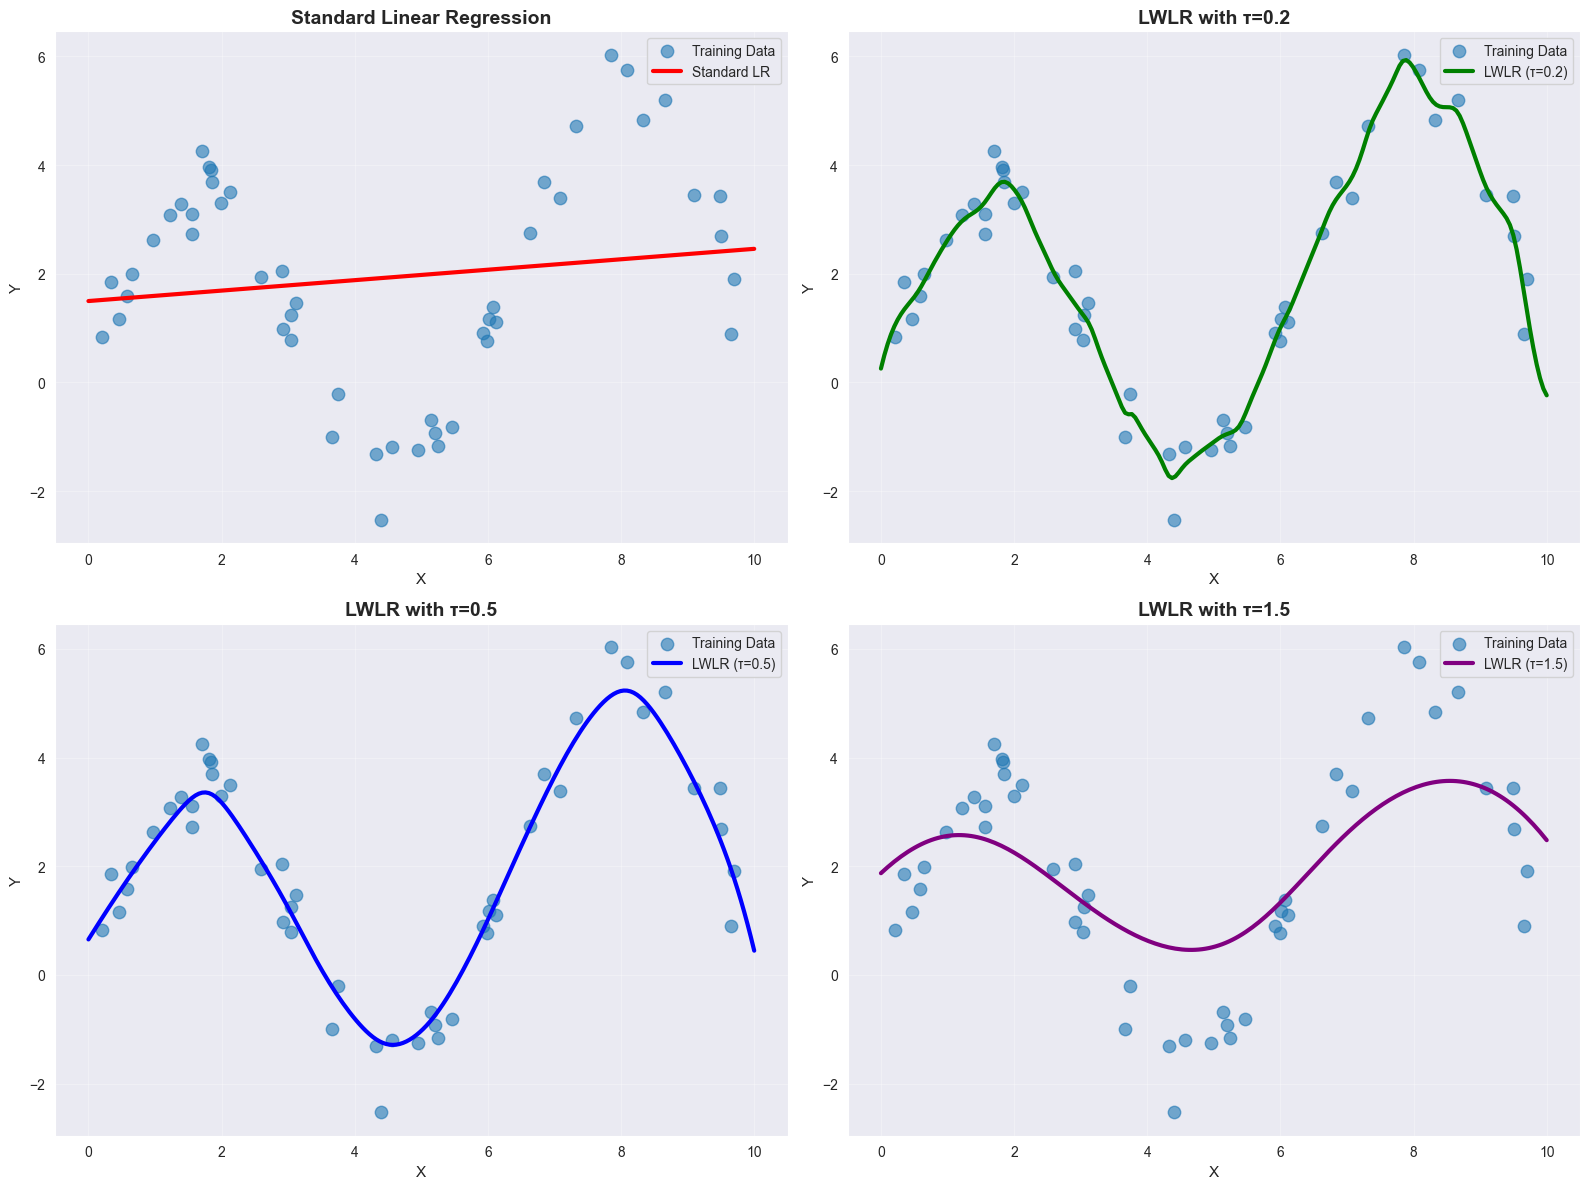


📊 Observations:
   1. Standard LR fails to capture non-linearity (just a straight line)
   2. LWLR with tau=0.2 highly flexible, follows data closely
   3. LWLR with tau=0.5 balanced - smooth yet still captures pattern
   4. LWLR with tau=1.5 starts resembling standard LR (too smooth)


In [16]:
# Test range
X_test = np.linspace(0, 10, 200)

# Standard Linear Regression
lr = LinearRegression()
lr.fit(X_train.reshape(-1, 1), y_train)
y_standard = lr.predict(X_test.reshape(-1, 1))

# LWLR with different taus
tau_values = [0.2, 0.5, 1.5]
lwlr_predictions = {}

for tau in tau_values:
    lwlr = LocalWeightedLR(tau=tau)
    lwlr.fit(X_train.reshape(-1, 1), y_train)
    lwlr_predictions[tau] = lwlr.predict(X_test.reshape(-1, 1))

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

# Plot 1: Standard LR
axes[0].scatter(X_train, y_train, alpha=0.6, s=80, label='Training Data')
axes[0].plot(X_test, y_standard, 'r-', linewidth=3, label='Standard LR')
axes[0].set_title('Standard Linear Regression', fontsize=14, fontweight='bold')
axes[0].set_xlabel('X', fontsize=11)
axes[0].set_ylabel('Y', fontsize=11)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2-4: LWLR with different taus
colors = ['green', 'blue', 'purple']
for idx, (tau, color) in enumerate(zip(tau_values, colors)):
    axes[idx + 1].scatter(X_train, y_train, alpha=0.6, s=80, label='Training Data')
    axes[idx + 1].plot(X_test, lwlr_predictions[tau], color=color, 
                       linewidth=3, label=f'LWLR (τ={tau})')
    axes[idx + 1].set_title(f'LWLR with τ={tau}', fontsize=14, fontweight='bold')
    axes[idx + 1].set_xlabel('X', fontsize=11)
    axes[idx + 1].set_ylabel('Y', fontsize=11)
    axes[idx + 1].legend()
    axes[idx + 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Observations:")
print("   1. Standard LR fails to capture non-linearity (just a straight line)")
print("   2. LWLR with tau=0.2 highly flexible, follows data closely")
print("   3. LWLR with tau=0.5 balanced - smooth yet still captures pattern")
print("   4. LWLR with tau=1.5 starts resembling standard LR (too smooth)")

## 14. Visualize Weight Distribution

Now here's what's interesting – let's see how weights distribute for specific query points

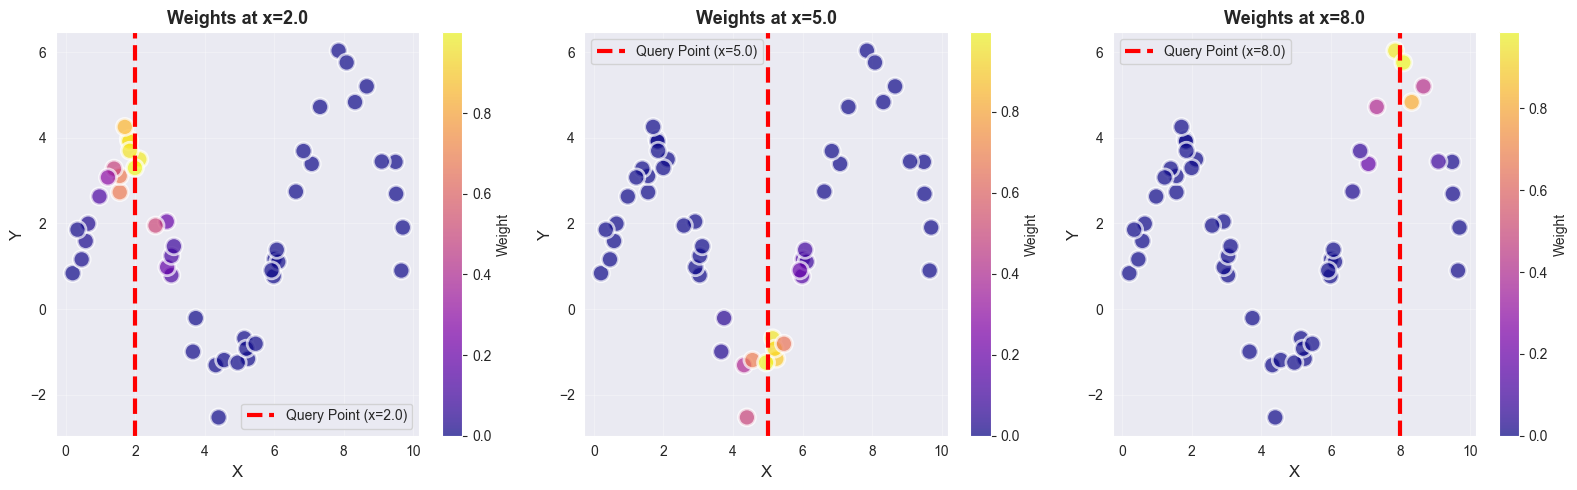


💡 Key Insight:
   Points close to the query point have brighter color (high weight)
   Points far away have darker color (weight low/nearly 0)
   Pretty cool, right?


In [17]:
# Initialize LWLR
lwlr = LocalWeightedLR(tau=0.5)
lwlr.fit(X_train.reshape(-1, 1), y_train)

# Visualize weights for different query points
query_points = [2.0, 5.0, 8.0]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, q_point in enumerate(query_points):
    weights = lwlr._calculate_weights(np.array([[q_point]]))
    
    # Scatter with color based on weight
    scatter = axes[idx].scatter(X_train, y_train, c=weights, cmap='plasma', 
                               s=150, alpha=0.7, edgecolors='white', linewidth=2)
    axes[idx].axvline(q_point, color='red', linestyle='--', linewidth=3,
                     label=f'Query Point (x={q_point})')
    
    axes[idx].set_xlabel('X', fontsize=12)
    axes[idx].set_ylabel('Y', fontsize=12)
    axes[idx].set_title(f'Weights at x={q_point}', fontsize=13, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(alpha=0.3)
    
    # Colorbar
    cbar = plt.colorbar(scatter, ax=axes[idx])
    cbar.set_label('Weight', fontsize=10)

plt.tight_layout()
plt.show()

print("\n💡 Key Insight:")
print("   Points close to the query point have brighter color (high weight)")
print("   Points far away have darker color (weight low/nearly 0)")
print("   Pretty cool, right?")

## 15. Performance Analysis

Calculate MSE to compare performance

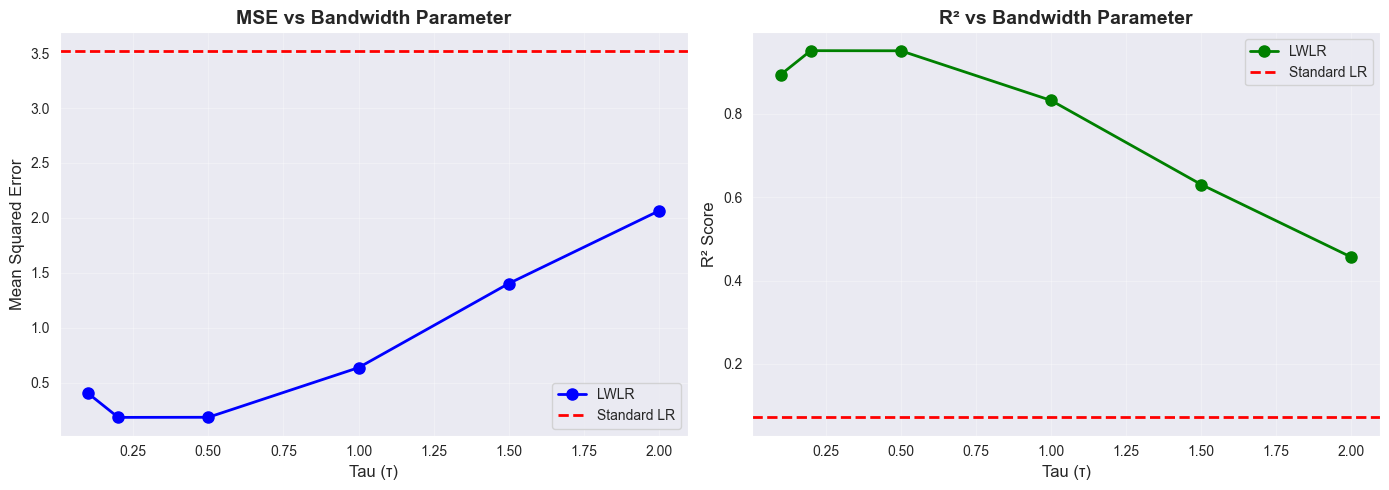


🏆 Best tau: 0.2
   MSE: 0.1842
   R²: 0.9515

📊 Standard LR Performance:
   MSE: 3.5222
   R²: 0.0717

✨ LWLR improvement: 94.8% reduction in MSE!


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Generate test set
X_test_eval = np.random.uniform(0, 10, 100)
y_test_eval = np.sin(X_test_eval) * 3 + X_test_eval * 0.3 + np.random.normal(0, 0.3, 100)

# Standard LR
y_pred_standard = lr.predict(X_test_eval.reshape(-1, 1))
mse_standard = mean_squared_error(y_test_eval, y_pred_standard)
r2_standard = r2_score(y_test_eval, y_pred_standard)

# LWLR with different taus
results = []
tau_test_values = [0.1, 0.2, 0.5, 1.0, 1.5, 2.0]

for tau in tau_test_values:
    lwlr = LocalWeightedLR(tau=tau)
    lwlr.fit(X_train.reshape(-1, 1), y_train)
    y_pred = lwlr.predict(X_test_eval.reshape(-1, 1))
    
    mse = mean_squared_error(y_test_eval, y_pred)
    r2 = r2_score(y_test_eval, y_pred)
    
    results.append({
        'tau': tau,
        'MSE': mse,
        'R²': r2
    })

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# MSE plot
taus = [r['tau'] for r in results]
mses = [r['MSE'] for r in results]
ax1.plot(taus, mses, 'bo-', linewidth=2, markersize=8, label='LWLR')
ax1.axhline(mse_standard, color='red', linestyle='--', linewidth=2, label='Standard LR')
ax1.set_xlabel('Tau (τ)', fontsize=12)
ax1.set_ylabel('Mean Squared Error', fontsize=12)
ax1.set_title('MSE vs Bandwidth Parameter', fontsize=14, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# R² plot
r2s = [r['R²'] for r in results]
ax2.plot(taus, r2s, 'go-', linewidth=2, markersize=8, label='LWLR')
ax2.axhline(r2_standard, color='red', linestyle='--', linewidth=2, label='Standard LR')
ax2.set_xlabel('Tau (τ)', fontsize=12)
ax2.set_ylabel('R² Score', fontsize=12)
ax2.set_title('R² vs Bandwidth Parameter', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Print best tau
best_result = min(results, key=lambda x: x['MSE'])
print(f"\n🏆 Best tau: {best_result['tau']}")
print(f"   MSE: {best_result['MSE']:.4f}")
print(f"   R²: {best_result['R²']:.4f}")
print(f"\n📊 Standard LR Performance:")
print(f"   MSE: {mse_standard:.4f}")
print(f"   R²: {r2_standard:.4f}")
print(f"\n✨ LWLR improvement: {((mse_standard - best_result['MSE']) / mse_standard * 100):.1f}% reduction in MSE!")

## 16. Real-World Application: California Housing Dataset

Alright, synthetic data is great for learning, but let's see how LWLR performs on **real data**!

We'll use the **California Housing Dataset** from sklearn (originally from StatLib, used in the 1997 paper "Sparse Spatial Autoregressions" by Pace & Barry). This dataset contains information about housing in California districts.

**Why this dataset?**
- Real non-linear relationships between features
- Geographic data where local patterns matter (perfect for LWLR!)
- 20,640 samples - we'll use a subset to keep computation reasonable

**Our task:** Predict median house value based on median income (a clearly non-linear relationship)

Loading California Housing Dataset...
Dataset loaded: 20640 samples
Feature: MedInc (Median Income)
Target: Median House Value

Using 800 samples for training
Using 200 samples for testing

Feature scaling applied using StandardScaler
Original range: [0.85, 15.00]
Scaled range: [-1.54, 5.55]


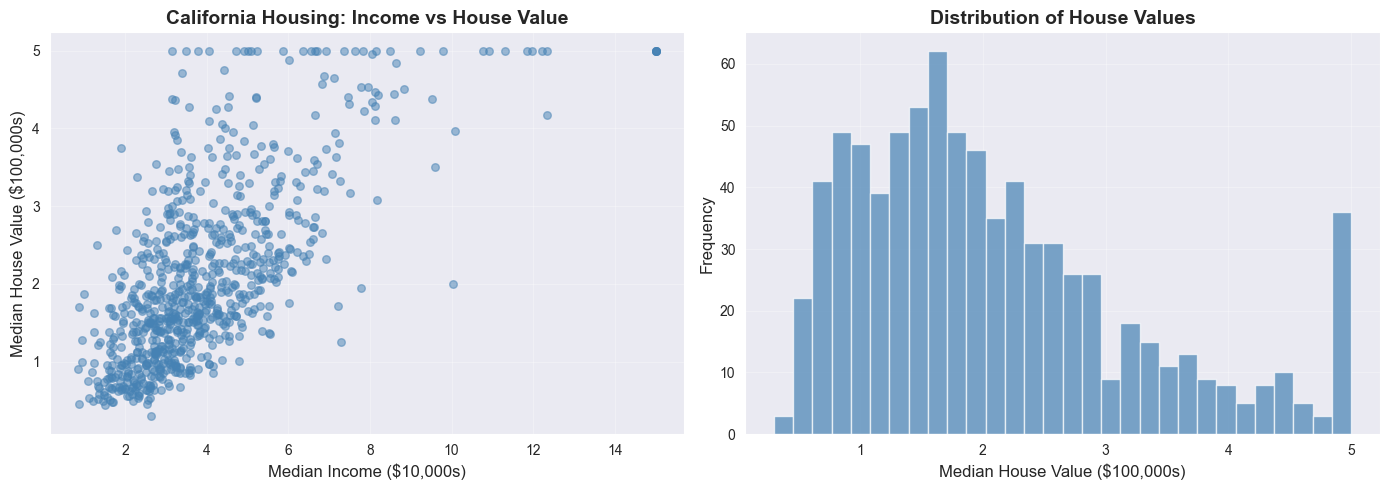


🔍 Notice the non-linear pattern! Higher income → higher value, but it curves.


In [20]:
# ═══════════════════════════════════════════════════════════════
# REAL-WORLD APPLICATION: CALIFORNIA HOUSING
# ═══════════════════════════════════════════════════════════════
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
print("Loading California Housing Dataset...")
california = fetch_california_housing()

# We'll focus on: MedInc (Median Income) → MedHouseVal (Median House Value)
# This relationship is clearly non-linear!
X_full = california.data[:, 0]  # MedInc (median income in $10,000s)
y_full = california.target       # MedHouseVal (in $100,000s)

print(f"Dataset loaded: {len(X_full)} samples")
print(f"Feature: {california.feature_names[0]} (Median Income)")
print(f"Target: Median House Value")

# Sample subset for computational efficiency (LWLR is O(n³) per prediction!)
np.random.seed(42)
sample_idx = np.random.choice(len(X_full), size=1000, replace=False)
X_california = X_full[sample_idx]
y_california = y_full[sample_idx]

# Train-test split
X_cal_train, X_cal_test, y_cal_train, y_cal_test = train_test_split(
    X_california, y_california, test_size=0.2, random_state=42
)

print(f"\nUsing {len(X_cal_train)} samples for training")
print(f"Using {len(X_cal_test)} samples for testing")

# Feature scaling - CRITICAL for distance-based algorithms!
scaler = StandardScaler()
X_cal_train_scaled = scaler.fit_transform(X_cal_train.reshape(-1, 1)).flatten()
X_cal_test_scaled = scaler.transform(X_cal_test.reshape(-1, 1)).flatten()

print(f"\nFeature scaling applied using StandardScaler")
print(f"Original range: [{X_cal_train.min():.2f}, {X_cal_train.max():.2f}]")
print(f"Scaled range: [{X_cal_train_scaled.min():.2f}, {X_cal_train_scaled.max():.2f}]")

# Visualize the data
plt.figure(figsize=(14, 5))

# Plot 1: Scatter plot
plt.subplot(1, 2, 1)
plt.scatter(X_cal_train, y_cal_train, alpha=0.5, s=30, c='steelblue')
plt.xlabel('Median Income ($10,000s)', fontsize=12)
plt.ylabel('Median House Value ($100,000s)', fontsize=12)
plt.title('California Housing: Income vs House Value', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

# Plot 2: Histogram
plt.subplot(1, 2, 2)
plt.hist(y_cal_train, bins=30, color='steelblue', edgecolor='white', alpha=0.7)
plt.xlabel('Median House Value ($100,000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of House Values', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🔍 Notice the non-linear pattern! Higher income → higher value, but it curves.")

In [ ]:
# ═══════════════════════════════════════════════════════════════
# LWLR vs LINEAR REGRESSION ON REAL DATA
# ═══════════════════════════════════════════════════════════════

# Prepare data for prediction (scaled space)
X_plot_scaled = np.linspace(X_cal_train_scaled.min(), X_cal_train_scaled.max(), 100)
# Transform back to original scale for visualization
X_plot_original = scaler.inverse_transform(X_plot_scaled.reshape(-1, 1)).flatten()

# 1. Standard Linear Regression (on scaled data)
lr_california = LinearRegression()
lr_california.fit(X_cal_train_scaled.reshape(-1, 1), y_cal_train)
y_lr_pred = lr_california.predict(X_plot_scaled.reshape(-1, 1))

# 2. LWLR with different tau values (on scaled data)
tau_values_cal = [0.3, 0.8, 2.0]
lwlr_predictions_cal = {}

print("Training LWLR models on scaled data (this may take a moment)...")
for tau in tau_values_cal:
    lwlr_cal = LocalWeightedLR(tau=tau)
    lwlr_cal.fit(X_cal_train_scaled.reshape(-1, 1), y_cal_train)
    lwlr_predictions_cal[tau] = lwlr_cal.predict(X_plot_scaled.reshape(-1, 1))
    print(f"   tau = {tau} completed")

# Plotting comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Plot 1: Standard LR (plot in original scale)
axes[0].scatter(X_cal_train, y_cal_train, alpha=0.4, s=20, label='Training Data')
axes[0].plot(X_plot_original, y_lr_pred, 'r-', linewidth=3, label='Standard LR')
axes[0].set_title('Standard Linear Regression', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Median Income ($10,000s)', fontsize=11)
axes[0].set_ylabel('Median House Value ($100,000s)', fontsize=11)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot 2-4: LWLR with different taus (plot in original scale)
colors = ['green', 'blue', 'purple']
for idx, (tau, color) in enumerate(zip(tau_values_cal, colors)):
    axes[idx + 1].scatter(X_cal_train, y_cal_train, alpha=0.4, s=20, label='Training Data')
    axes[idx + 1].plot(X_plot_original, lwlr_predictions_cal[tau], color=color, 
                       linewidth=3, label=f'LWLR (τ={tau})')
    axes[idx + 1].set_title(f'LWLR with τ={tau}', fontsize=13, fontweight='bold')
    axes[idx + 1].set_xlabel('Median Income ($10,000s)', fontsize=11)
    axes[idx + 1].set_ylabel('Median House Value ($100,000s)', fontsize=11)
    axes[idx + 1].legend()
    axes[idx + 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Observations on REAL data:")
print("   • τ=0.3 captures local patterns but might be too wiggly")
print("   • τ=0.8 balances flexibility and smoothness")
print("   • τ=2.0 smoother but misses some non-linearity")
print("\n💡 Note: Models trained on SCALED data for proper distance calculations")

In [ ]:
# ═══════════════════════════════════════════════════════════════
# QUANTITATIVE COMPARISON ON TEST SET
# ═══════════════════════════════════════════════════════════════

print("PERFORMANCE COMPARISON ON CALIFORNIA HOUSING TEST SET")
print("=" * 60)

# Standard LR performance (on scaled data)
y_lr_test_pred = lr_california.predict(X_cal_test_scaled.reshape(-1, 1))
mse_lr = mean_squared_error(y_cal_test, y_lr_test_pred)
r2_lr = r2_score(y_cal_test, y_lr_test_pred)

print(f"\nStandard Linear Regression:")
print(f"   MSE: {mse_lr:.4f}")
print(f"   R²:  {r2_lr:.4f}")

# LWLR performance for different taus (on scaled data)
print(f"\nLocally Weighted Linear Regression:")
best_tau = None
best_mse = float('inf')

for tau in tau_values_cal:
    lwlr_cal = LocalWeightedLR(tau=tau)
    lwlr_cal.fit(X_cal_train_scaled.reshape(-1, 1), y_cal_train)
    y_lwlr_test_pred = lwlr_cal.predict(X_cal_test_scaled.reshape(-1, 1))
    
    mse_lwlr = mean_squared_error(y_cal_test, y_lwlr_test_pred)
    r2_lwlr = r2_score(y_cal_test, y_lwlr_test_pred)
    
    print(f"   τ = {tau}:")
    print(f"      MSE: {mse_lwlr:.4f}")
    print(f"      R²:  {r2_lwlr:.4f}")
    
    if mse_lwlr < best_mse:
        best_mse = mse_lwlr
        best_tau = tau

# Summary
print("\n" + "=" * 60)
print("RESULTS SUMMARY:")
improvement = ((mse_lr - best_mse) / mse_lr) * 100
print(f"   Best LWLR tau: {best_tau}")
print(f"   LWLR improvement over Standard LR: {improvement:.1f}% lower MSE")
print("=" * 60)

if improvement > 0:
    print("\nLWLR outperforms Standard LR on this non-linear real-world data!")
    print("Feature scaling was critical for proper distance-based weighting.")
else:
    print("\nFor this data slice, Standard LR performs similarly.")

## 17. Key Takeaways

### Advantages of LWLR:
1. **Flexible** - Can model non-linear relationships without needing polynomial features
2. **Adaptive** - Model changes based on local data patterns
3. **No training phase** - Can predict immediately after storing data

### Disadvantages:
1. **Slow prediction** - Must calculate weights and fit model for each prediction
2. **Memory intensive** - Must store all training data
3. **Tau selection** - Requires tuning bandwidth parameter

### When to Use LWLR:
- Data has **non-linear patterns** that are hard to model with standard LR
- **Small-to-medium datasets** (< 10k samples) - due to computational cost
- You can afford **slower prediction time**
- Patterns vary across different regions (heterogeneous data)

### When NOT to Use:
- **Large datasets** (> 100k samples)
- Need **real-time predictions** with low latency
- Linear relationship is sufficient to model the data
- Production system requires fast inference

## 18. Next Steps to Become an AI Researcher

### 1. **Implement Variations**
Try implementing:
- Different kernel functions (Epanechnikov, Tricube)
- Automatic tau selection via cross-validation
- Multi-dimensional LWLR

### 2. **Read Original Papers**
- Cleveland & Devlin (1988) - "Locally Weighted Regression: An Approach to Regression Analysis by Local Fitting"
- Atkeson et al. (1997) - "Locally Weighted Learning"

### 3. **Compare with Related Methods**
- K-Nearest Neighbors Regression
- Gaussian Process Regression
- Kernel Ridge Regression

### 4. **Apply to Real Datasets**
Try LWLR on:
- Housing price prediction
- Stock price forecasting
- Weather data modeling

### Remember:
> "It's okay if you don't fully understand the math yet. What matters is grasping the concepts and practicing continuously!"
> 
> "Best way to learn ML: Implement from scratch → Visualize → Understand → Apply"

---

**Congrats! You've mastered LWLR!**

Keep learning, keep coding, and you'll definitely become an AI Researcher!

---

# CAPSTONE PROJECT

## Objective
Apply Locally Weighted Linear Regression for real-world problem solving.

## Requirements
- [ ] Data preparation and EDA
- [ ] Model implementation (from scratch + scikit-learn)
- [ ] Hyperparameter tuning
- [ ] Evaluation with proper metrics
- [ ] Deployment with FastAPI
- [ ] Documentation

## Grading
| Criteria | Points |
|----------|--------|
| Data Handling | 20 |
| Model Quality | 25 |
| Evaluation | 20 |
| Deployment | 20 |
| Documentation | 15 |
| **Total** | **100** |

---

# Summary & Key Takeaways

Congratulations! You've learned **Locally Weighted Linear Regression (LWLR)**.

### Key Points:
1. **Non-Parametric:** LWLR doesn't discard training data. Training data is stored permanently for future predictions.
2. **Local Focus:** By using **weights**, we only care about data around the query point.
3. **Bandwidth (Tau):** The key to LWLR performance. Controls the Bias-Variance tradeoff.
4. **Computationally Expensive:** Must perform training (matrix inversion) for each prediction point. Not suitable for Big Data.

### Critical Implementation Tip:
> **DON'T FORGET SCALING!**
> Because LWLR uses **distance** (Euclidean Distance), if your features have different scales (e.g., House Area [100-500] vs Number of Rooms [1-5]), features with larger scales will dominate distance calculations.
> **Solution:** Always use `StandardScaler` or `MinMaxScaler` before using LWLR.
> 

> **This notebook demonstrates proper scaling** in the California Housing example (Section 16).